In [80]:
import numpy as np;
import matplotlib.pyplot as plt;
import random
from time import time;

In [81]:
def load_images(path_to_images):
    images = np.fromfile(path_to_images, dtype=np.uint8, count= -1)[16:];
    return images;

def reshape_images(images):
    return images.reshape(-1, 28, 28);

def load_labels(path_to_labels):
    labels = np.fromfile(path_to_labels, dtype=np.uint8, count=-1)[8:];
    return labels;

In [82]:
DATA_PATH = 'C:/Users/user/Desktop/data/'

In [83]:
training_images_filepath = (DATA_PATH + "train-images.idx3-ubyte");
training_labels_filepath = (DATA_PATH + "train-labels.idx1-ubyte");

test_images_filepath = (DATA_PATH + "t10k-images.idx3-ubyte");
test_labels_filepath = (DATA_PATH + "t10k-labels.idx1-ubyte");

x_train = load_images(training_images_filepath);
x_test = load_images(test_images_filepath);

y_train = load_labels(training_labels_filepath);
y_test = load_labels(test_labels_filepath);

x_train = reshape_images(x_train);
x_test = reshape_images(x_test);

In [84]:
print("Shape of train data:", x_train.shape)
print("Shape of test data:", x_test.shape)

Shape of train data: (60000, 28, 28)
Shape of test data: (10000, 28, 28)


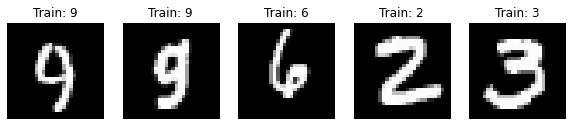

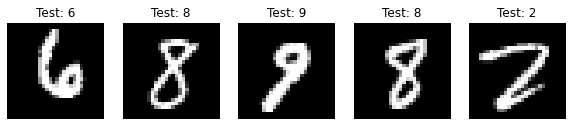

In [85]:
plt.figure(figsize=(10, 5));
for i in range(5):
    random_index_train = randint(1, 60000);
    plt.subplot(1, 5, i + 1);
    plt.imshow(x_train[random_index_train], cmap='gray');
    plt.title(f'Train: {y_train[random_index_train]}');
    plt.axis('off');
plt.show();

plt.figure(figsize=(10, 5));
for i in range(5):
    random_index_test = randint(1, 10000);
    plt.subplot(1, 5, i + 1);
    plt.imshow(x_test[random_index_test], cmap='gray');
    plt.title(f'Test: {y_test[random_index_test]}');
    plt.axis('off');
plt.show();

In [86]:
x_train = x_train.reshape(-1, 784);
x_test = x_test.reshape(-1, 784);

In [87]:
print('Shape of train data:', x_train.shape)
print('Shape of test data:', x_test.shape)

Shape of train data: (60000, 784)
Shape of test data: (10000, 784)


In [88]:
x_train = x_train / 255;
x_test = x_test / 255;

In [89]:
y_test = np.eye(10)[y_test];
y_train = np.eye(10)[y_train];

In [103]:
def ReLU(Z):
    return np.maximum(Z, 0);

def ReLU_derivative(Z):
    return Z > 0;

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True));
    A = exp_Z / np.sum(exp_Z, axis=1, keepdims=True);
    return A

def get_accuracy(Y, A2):
    return np.mean(np.argmax(A2, axis = 1) == np.argmax(Y, axis = 1))

In [104]:
def initialize_params(input_size, hidden_size, output_size):

    # He initialization
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size);

    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size);

    b1 = np.zeros((1, hidden_size));
    b2 = np.zeros((1, output_size));

    return W1, b1, W2, b2;

In [105]:
def forward_propagation(X, w1, b1, w2, b2):

    Z1 = np.dot(X, w1) + b1;
    A1 = ReLU(Z1);

    Z2  = np.dot(A1, w2) + b2;
    A2 = softmax(Z2);

    return Z1, A1, Z2, A2;

def backward_propagation(X, Y, Z1, A1, Z2, A2,
                         w2):

    L = Y.shape[0];

    dZ2 = A2 - Y;

    dW2 = np.dot(A1.T, dZ2) / L;
    db2 = np.sum(dZ2, axis=0, keepdims=True) / L;

    dA1 = np.dot(dZ2, w2.T);
    dZ1 = dA1 * ReLU_derivative(Z1);

    dW1 = np.dot(X.T, dZ1) / L;
    db1 = np.sum(dZ1, axis=0, keepdims=True) / L;

    return dW1, db1, dW2, db2;

def update_params(W1, b1, W2, b2,
                              dW1, db1, dW2, db2, alpha):

    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

    return W1, b1, W2, b2

In [106]:
def train_network(x_train, y_train, x_test, y_test,
                  input_layer_size, hiiden_layer_size, output_layer_size,
                  count_epoch, batch_size, alpha):

    W1, b1, W2, b2 = initialize_params(input_layer_size,
                            hiiden_layer_size, output_layer_size);

    length_X_train = x_train.shape[0];

    for epoch in range(count_epoch):

        time_start = time();
        shuffle = np.random.permutation(length_X_train)
        x_train_shuffled = x_train[shuffle]
        y_train_shuffled = y_train[shuffle]

        for batch in range(0, length_X_train, batch_size):

            x_batch = x_train_shuffled[batch:batch+batch_size]
            y_batch = y_train_shuffled[batch:batch+batch_size]

            Z1, A1, Z2, A2 = forward_propagation(x_batch, W1, b1, W2, b2);

            dW1, db1, dW2, db2 = backward_propagation(x_batch, y_batch,
                        Z1, A1, Z2, A2, W2);

            W1, b1, W2, b2 = update_params(W1, b1, W2, b2,
                              dW1, db1, dW2, db2, alpha);

        _, _, _ , A2_train = forward_propagation(x_train, W1, b1, W2, b2);

        
        accuracy_train = get_accuracy(A2_train, y_train)

        time_end = time();

        print(f"epoch: {epoch}; time: {time_end - time_start: .2f} sec.; accuracy: {accuracy_train: .5f};")
        print(" ")

    _, _, _, A2_test = forward_propagation(x_test, W1, b1, W2, b2);
    accuracy_test = get_accuracy(A2_test, y_test);

    print("");
    print(f"accuracy test: {accuracy_test: .5f}");

In [107]:
input_layer_size = 784;
hidden_layer_size = 300;
outputsize = 10;
count_epoch = 20;
batch_size = 32;
alpha = 0.1;

train_network(x_train, y_train, x_test, y_test,
                  input_layer_size, hidden_layer_size, outputsize,
                  count_epoch, batch_size, alpha);

epoch: 0; time:  9.95 sec.; accuracy:  0.95362;
 
epoch: 1; time:  10.26 sec.; accuracy:  0.97155;
 
epoch: 2; time:  11.59 sec.; accuracy:  0.98058;
 
epoch: 3; time:  10.82 sec.; accuracy:  0.97902;
 
epoch: 4; time:  10.10 sec.; accuracy:  0.98757;
 
epoch: 5; time:  9.44 sec.; accuracy:  0.98797;
 
epoch: 6; time:  9.86 sec.; accuracy:  0.99187;
 
epoch: 7; time:  10.31 sec.; accuracy:  0.99358;
 
epoch: 8; time:  11.35 sec.; accuracy:  0.99472;
 
epoch: 9; time:  10.38 sec.; accuracy:  0.99658;
 
epoch: 10; time:  10.50 sec.; accuracy:  0.99735;
 
epoch: 11; time:  9.76 sec.; accuracy:  0.99755;
 
epoch: 12; time:  10.10 sec.; accuracy:  0.99842;
 
epoch: 13; time:  10.37 sec.; accuracy:  0.99920;
 
epoch: 14; time:  11.09 sec.; accuracy:  0.99950;
 
epoch: 15; time:  11.36 sec.; accuracy:  0.99962;
 
epoch: 16; time:  11.85 sec.; accuracy:  0.99967;
 
epoch: 17; time:  11.27 sec.; accuracy:  0.99972;
 
epoch: 18; time:  10.43 sec.; accuracy:  0.99988;
 
epoch: 19; time:  10.10 se